In [1]:
import os
import glob
import shutil
import json
import keras
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from PIL import Image as PImage
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
pic_index = 4

In [2]:
work_dir = "../input/tomato"
os.listdir(work_dir)

['New Plant Diseases Dataset(Augmented)',
 'new plant diseases dataset(augmented)']

In [3]:
training_df = "../input/tomato/New Plant Diseases Dataset(Augmented)/train/"
os.listdir(training_df)

['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']

In [4]:
# Directories of the training images
Tomato_Late_blight = os.path.join(training_df + 'Tomato___Late_blight')
Tomato_healthy = os.path.join(training_df + 'Tomato___healthy')
Tomato_Early_blight = os.path.join(training_df + 'Tomato___Early_blight')
Tomato_Septoria_leaf_spot = os.path.join(training_df + 'Tomato___Septoria_leaf_spot')
Tomato_Tomato_Yellow_Leaf_Curl_Virus = os.path.join(training_df + 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')
Tomato_Bacterial_spot = os.path.join(training_df + 'Tomato___Bacterial_spot')
Tomato_Target_Spot = os.path.join(training_df + 'Tomato___Target_Spot')
Tomato_Tomato_mosaic_virus = os.path.join(training_df + 'Tomato___Tomato_mosaic_virus')
Tomato_Leaf_Mold = os.path.join(training_df + 'Tomato___Leaf_Mold')
Tomato_Spider_mites = os.path.join(training_df + 'Tomato___Spider_mites Two-spotted_spider_mite')

In [5]:
def loadImages(path):
    # return array of images

#     imagesList = listdir(path)
    loadedImages = []
#     for image in imagesList:
    ext = ['png', 'jpg', 'gif', 'JPG']
    for e in ext:
        for filename in glob.glob(path + "/*." + e):
            img = PImage.open(filename)
            loadedImages.append(img)

    return loadedImages


def display_images(image):
    for img in image:
        # you can show image
        imgplot = plt.imshow(img)
        plt.show()

#### The Late_blight Tomato

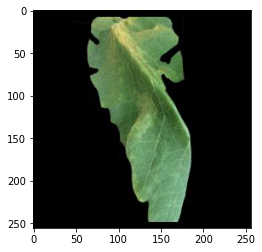

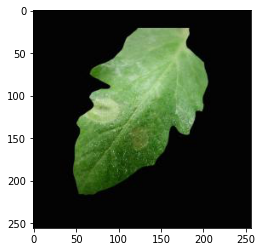

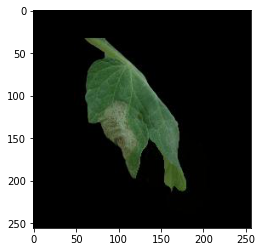

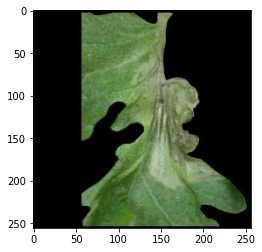

1851

In [6]:
late_b = loadImages(Tomato_Late_blight)
next_lb = late_b[pic_index-4:pic_index]
display_images(next_lb)
len(late_b)

#### The Tomato_healthy

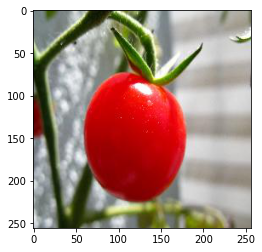

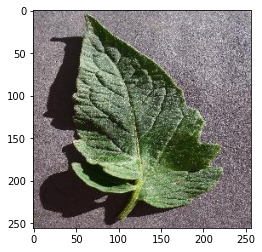

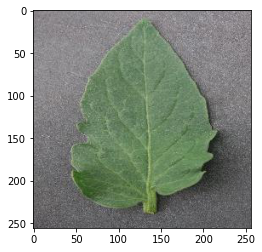

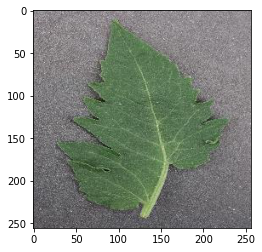

1926

In [7]:
healthy = loadImages(Tomato_healthy)
next_th = healthy[pic_index-4:pic_index]
display_images(next_th)
len(healthy)

#### Tomato_Early_blight

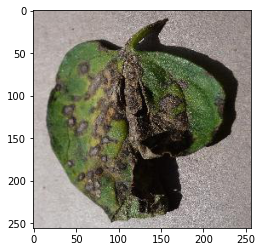

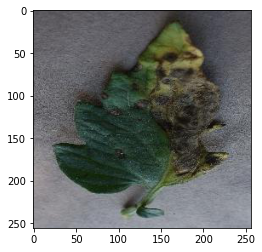

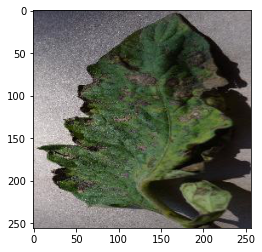

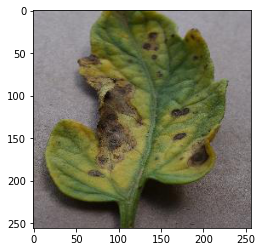

1920

In [8]:
early_b = loadImages(Tomato_Early_blight)
next_eb = early_b[pic_index-4:pic_index]
display_images(next_eb)
len(early_b)

#### Tomato_Septoria_leaf_spot

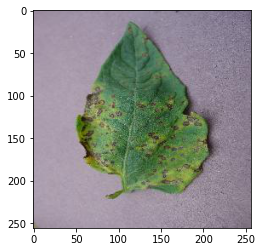

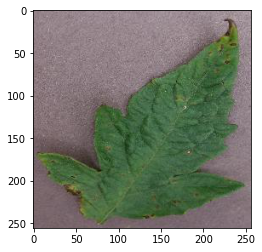

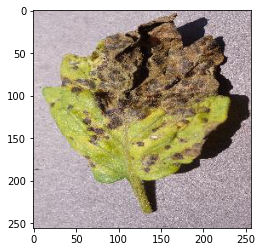

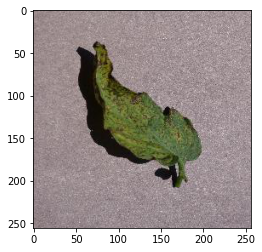

1745

In [9]:
sep_leaf = loadImages(Tomato_Septoria_leaf_spot)
next_slm = sep_leaf[pic_index-4:pic_index]
display_images(next_slm)
len(sep_leaf)

#### Tomato_Tomato_Yellow_Leaf_Curl_Virus

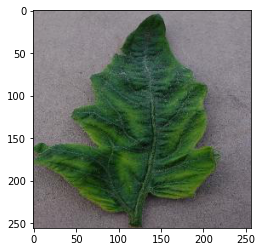

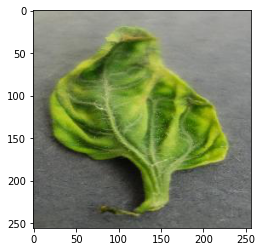

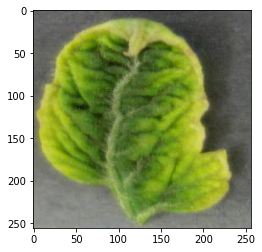

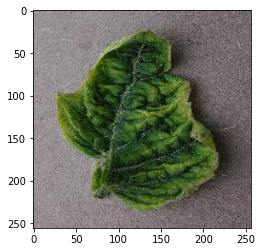

1961

In [10]:
yellow_leaf = loadImages(Tomato_Tomato_Yellow_Leaf_Curl_Virus)
next_yc = yellow_leaf[pic_index-4:pic_index]
display_images(next_yc)
len(yellow_leaf)

#### Tomato_Bacterial_spot

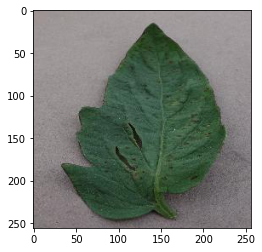

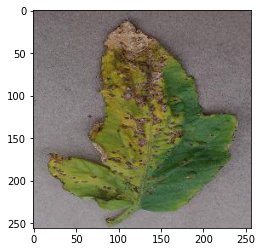

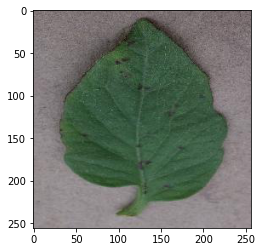

1702

In [11]:
bacteria_spot = loadImages(Tomato_Bacterial_spot)
next_bs = bacteria_spot[pic_index-4:pic_index]
display_images(next_bs)
len(bacteria_spot)

#### Tomato_Target_Spot

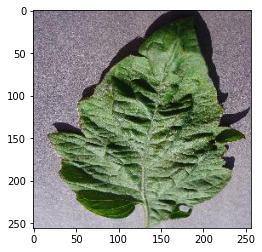

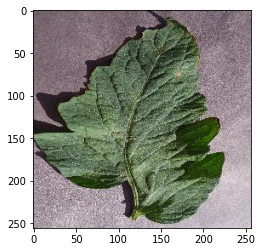

1827

In [12]:
target_spot = loadImages(Tomato_Target_Spot)
next_ts = target_spot[pic_index-4:pic_index]
display_images(next_ts)
len(target_spot)

#### Tomato_Tomato_mosaic_virus

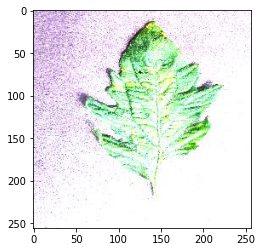

1790

In [13]:
mosaic_virus = loadImages(Tomato_Tomato_mosaic_virus)
next_mv = mosaic_virus[pic_index-4:pic_index]
display_images(next_mv)
len(mosaic_virus)

#### Tomato_Leaf_Mold

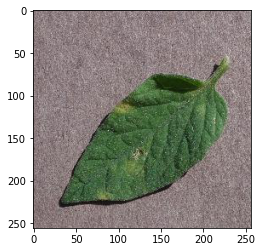

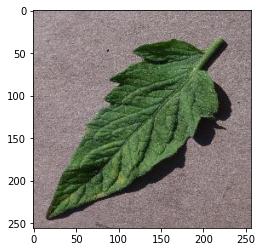

1882

In [14]:
leaf_mold = loadImages(Tomato_Leaf_Mold)
next_lm = leaf_mold[pic_index-4:pic_index]
display_images(next_lm)
len(leaf_mold)

#### Tomato_Spider_mites

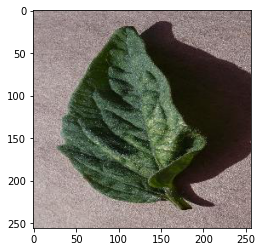

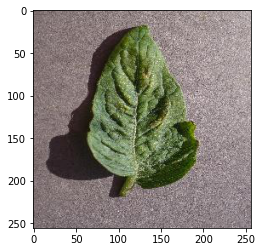

1741

In [15]:
spider_mites = loadImages(Tomato_Spider_mites)
next_ssm = spider_mites[pic_index-4:pic_index]
display_images(next_ssm)
len(spider_mites)

#### Get train and valid with path

In [16]:
path = "../input/tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
valid_path = os.path.join(path, "valid")
print(os.listdir(valid_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


- Using the glob function to access the folders.

In [17]:
# Use the glob function to get access to the training tomato datasets
from glob import glob
folders_train = glob("../input/tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders_train

['../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

In [18]:
# Use the glob function to get access to the validation tomato datasets
from glob import glob
folders_valid = glob("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/*")
folders_valid

['../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Leaf_Mold',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite']

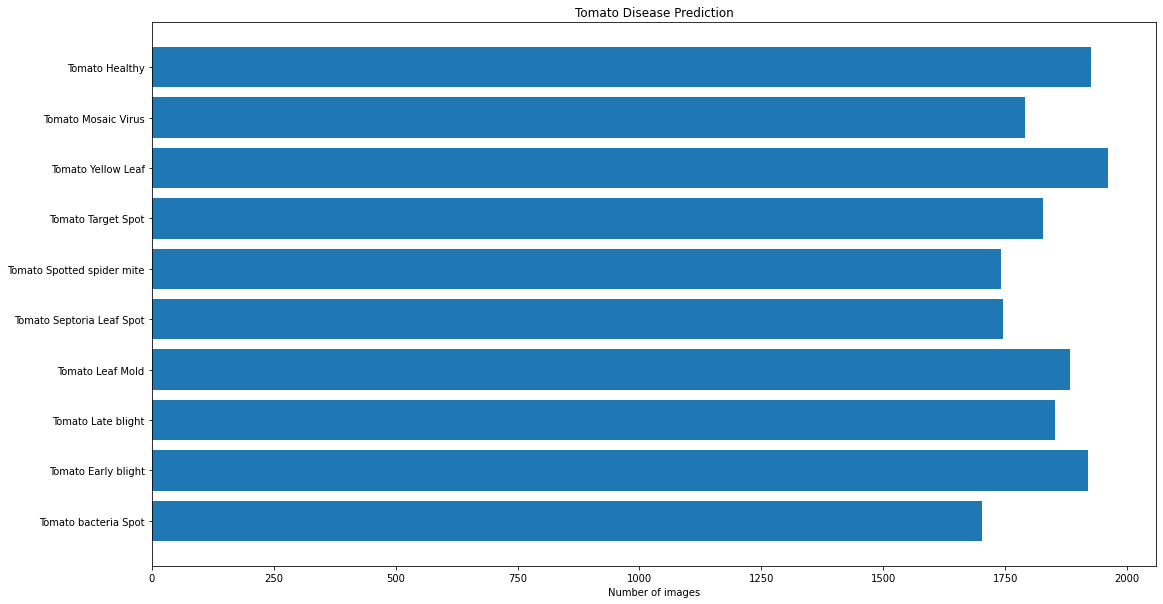

In [19]:
classes = [len(bacteria_spot), len(early_b), len(late_b), len(leaf_mold), len(sep_leaf),
          len(spider_mites), len(target_spot), len(yellow_leaf), len(mosaic_virus), len(healthy)]
labels = ('Tomato bacteria Spot', 'Tomato Early blight', 'Tomato Late blight', 'Tomato Leaf Mold', 'Tomato Septoria Leaf Spot',
         'Tomato Spotted spider mite', 'Tomato Target Spot', 'Tomato Yellow Leaf', 'Tomato Mosaic Virus', 'Tomato Healthy')
y_pos = range(len(classes))

fig = plt.figure(figsize=(18,10))
plt.barh(y_pos, classes, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('Number of images')
plt.title('Tomato Disease Prediction')
plt.show()

### Visual Geometry Group (VGG) net

- The original input image of dimension 256 x 256 was augmented to a dimension of `227 x 227` for the `AlexNet model` and `224 x224` for the `VGG16 net`. 

In [20]:
# VGG image size
SIZE = [224, 224]

- `VGG19 net`

- vgg19 input shape and weight

- weights: 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.

- input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

In [21]:
def model_compile(folders_train, SIZE):
    vg19 = VGG19(input_shape = SIZE + [3], weights="imagenet", include_top=False)
    for layer in vg19.layers:
        layer.trainable = False
    
    # Flattening the output layer
    x = Flatten()(vg19.output)
    prediction = Dense(len(folders_train), activation="softmax")(x)
    modelvg = Model(inputs=vg19.input, outputs=prediction)
    
    opt = Adam(lr=0.0001)
    modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    return modelvg

modelvg = model_compile(folders_train, SIZE)

80142336/80134624 [==============================] - 0s 0us/step


In [22]:
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Data Augmentation
- `Data augmentation` is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. `Data augmentation` techniques such as `cropping`, `padding`, and `horizontal flipping` are commonly used to train large neural networks.

- `Image data augmentation` is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. ... Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

- `Image augmentation` is a technique of altering the existing data to create some more data for the model training process. In other words, it is the process of artificially expanding the available dataset for training a deep learning model.

In [23]:
def model_fit(train_path, valid_path):
    
    # Image data augmentation is only applied to the training dataset
    # Using the Image DataGenerator class
    train_dataugmen_vg19 = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)
    
    # Image data augmentation is not to be applied to the validation/testing dataset
    valid_dataugmen_vg19 = ImageDataGenerator(rescale=1./255)
    
    train_set_vg19 = train_dataugmen_vg19.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
    
    valid_set_vg19 = valid_dataugmen_vg19.flow_from_directory(valid_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")
    
    r_vg19 = modelvg.fit(train_set_vg19,
                       validation_data=valid_set_vg19,
                       epochs=10,
                       steps_per_epoch=len(train_set_vg19),
                       validation_steps=len(valid_set_vg19))
    
    return r_vg19

r_vg19 = model_fit(train_path, valid_path)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Epoch 1/10
574/574 [==============================] - 268s 451ms/step - loss: 1.4868 - accuracy: 0.5275 - val_loss: 0.7707 - val_accuracy: 0.7634
Epoch 2/10
574/574 [==============================] - 234s 407ms/step - loss: 0.7224 - accuracy: 0.7814 - val_loss: 0.6023 - val_accuracy: 0.8122
Epoch 3/10
574/574 [==============================] - 233s 406ms/step - loss: 0.5777 - accuracy: 0.8251 - val_loss: 0.4869 - val_accuracy: 0.8489
Epoch 4/10
574/574 [==============================] - 231s 402ms/step - loss: 0.4868 - accuracy: 0.8497 - val_loss: 0.5212 - val_accuracy: 0.8218
Epoch 5/10
574/574 [==============================] - 235s 409ms/step - loss: 0.4427 - accuracy: 0.8668 - val_loss: 0.4286 - val_accuracy: 0.8646
Epoch 6/10
574/574 [==============================] - 263s 459ms/step - loss: 0.3985 - accuracy: 0.8786 - val_loss: 0.4124 - val_accuracy: 0.8678
Epoch 7/10
574/574 [=================

In [24]:
modelvg.save("vgg_19tomato.model")

- The `steps_per_epoch` argument must specify the number of batches of samples comprising one epoch. For example, if your original dataset has 10,000 images and your batch size is 32, then a reasonable value for `steps_per_epoch` when fitting a model on the augmented data might be `ceil(10,000/32)`, or `313 batches`.

- The images in the dataset are not used directly. Instead, only `augmented images` are provided to the model. Because the `augmentations` are performed randomly, this allows both modified images and close facsimiles of the original images (e.g. almost no augmentation) to be generated and used during training.

- Visualization for VGG19

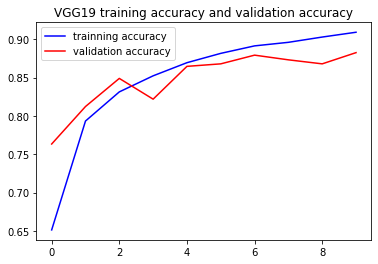

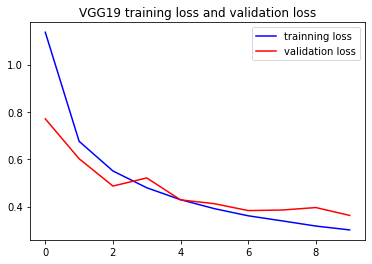

In [25]:
import matplotlib.pyplot as plt

accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']

loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']

epochs = range(len(accuracy))
plt.title("VGG19 training accuracy and validation accuracy")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.title("VGG19 training loss and validation loss")
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

- Prediction and testing

In [28]:
# y_pred = modelvg.predict(valid_set_vg19)
# y_pred = np.argmax(y_pred, axis=1)
# y_pred

- Tomato Bacterial Spot

In [29]:
bacteria_spot[:1]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F10AA36EB10>]

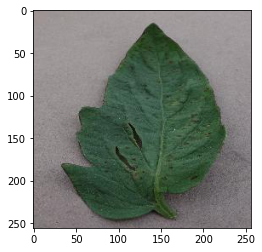

In [30]:
display_images(bacteria_spot[:1])

- load an image and detection

In [31]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("vgg_19tomato.model")

- prediction

In [32]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/0a91f50b-1263-4b2c-a8c1-f2a6025b82f3___PSU_CG 2136_270deg.JPG")])
np.argmax(prediction)

8

In [33]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG")])
np.argmax(prediction)

3

In [34]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_newPixel25.JPG")])
np.argmax(prediction)

9

- Class Dictionary

In [40]:
class_dict = train_set_vg19.class_indices
class_dict

- label

In [36]:
if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Healthy


In [37]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG")])
np.argmax(prediction)

if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Leaf Mold


In [38]:
prediction = model.predict([prepare("../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/0a91f50b-1263-4b2c-a8c1-f2a6025b82f3___PSU_CG 2136_270deg.JPG")])
np.argmax(prediction)

if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Mosaic Virus


- `tar.gz` file

In [39]:
# os.path.join(KAGGLE_OUTPUT_DRI, 'OUR_FILENAME.tar.gz')
# os.path.exists("../input/tomato")

import tarfile
import os.path

model_pth = "./"
os.listdir(model_pth)

output_dir = "/"
os.listdir(output_dir)

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

source_dir = model_pth
output_filename = 'vgg_19tomato_model' + '.tar.gz'
make_tarfile(output_filename, source_dir)